## Observations and Insights

## Dependencies and starter code

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
joined_df = mouse_metadata.merge(study_results, on='Mouse ID')
joined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#grouped_describe = joined_df.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)']
grouped_df = joined_df.groupby(['Drug Regimen'])
tumor_calc_df = pd.DataFrame({"Tumor Volume (mm3) Mean": grouped_df["Tumor Volume (mm3)"].mean(),
                              "Tumor Volume (mm3) Median": grouped_df["Tumor Volume (mm3)"].median(),
                              "Tumor Volume (mm3) Variance": grouped_df["Tumor Volume (mm3)"].var(),
                              "Tumor Volume (mm3) Std Dev": grouped_df["Tumor Volume (mm3)"].std(),
                              "Tumor Volume (mm3) SEM": grouped_df["Tumor Volume (mm3)"].sem()})
tumor_calc_df

Tumor Volume (mm3) Mean  Tumor Volume (mm3) Median  \
Drug Regimen                                                       
Capomulin                   40.675741                  41.557809   
Ceftamin                    52.591172                  51.776157   
Infubinol                   52.884795                  51.820584   
Ketapril                    55.235638                  53.698743   
Naftisol                    54.331565                  52.509285   
Placebo                     54.033581                  52.288934   
Propriva                    52.322552                  50.854632   
Ramicane                    40.216745                  40.673236   
Stelasyn                    54.233149                  52.431737   
Zoniferol                   53.236507                  51.818479   

              Tumor Volume (mm3) Variance  Tumor Volume (mm3) Std Dev  \
Drug Regimen                                                            
Capomulin                       24.947764                    4.994774   
Ceftamin                        39.290177                    6.268188   
Infubinol                       43.128684                    6.567243   
Ketapril                        68.553577                    8.279709   
Naftisol                        66.173479                    8.134708   
Placebo                         61.168083                    7.821003   
Propriva                        42.351070                    6.507770   
Ramicane                        23.486704                    4.846308   
Stelasyn                        59.450562                    7.710419   
Zoniferol                       48.533355                    6.966589   

              Tumor Volume (mm3) SEM  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.512884  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

## Bar plots

<IPython.core.display.Javascript object>


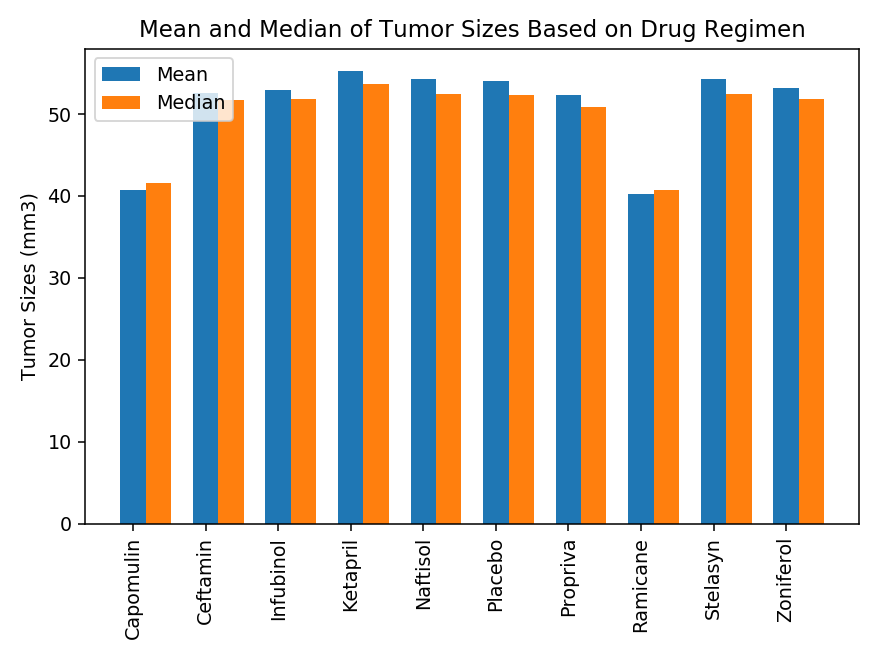

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using panda

drugs = list(tumor_calc_df.index)
x_axis = np.arange(len(drugs))

mean = tumor_calc_df['Tumor Volume (mm3) Mean']
median = tumor_calc_df['Tumor Volume (mm3) Median']
width = 0.35  


fig, mean_median = plt.subplots()
p1 = mean_median.bar(x_axis, mean, width, label = 'Mean')
p2 = mean_median.bar(x_axis + width, median, width, label = 'Median')

mean_median.set_ylabel('Tumor Sizes (mm3)')
mean_median.set_title('Mean and Median of Tumor Sizes Based on Drug Regimen')
mean_median.set_xticks(x_axis)
mean_median.set_xticklabels(list(drugs), rotation = 'vertical')
mean_median.legend()

fig.tight_layout()


#var = tumor_calc_df['Tumor Volume (mm3) Variance']
#std = tumor_calc_df['Tumor Volume (mm3) Std Dev']
#sem = tumor_calc_df['Tumor Volume (mm3) SEM']

In [ ]:
plt.bar(x_axis, tumor_calc_df['Tumor Volume (mm3) Variance'], color = 'b', alpha = 0.5, width = 0.25, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Variance'].max() + 10)
plt.title("Variance of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")

plt.show()
plt.tight_layout()

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

<IPython.core.display.Javascript object>


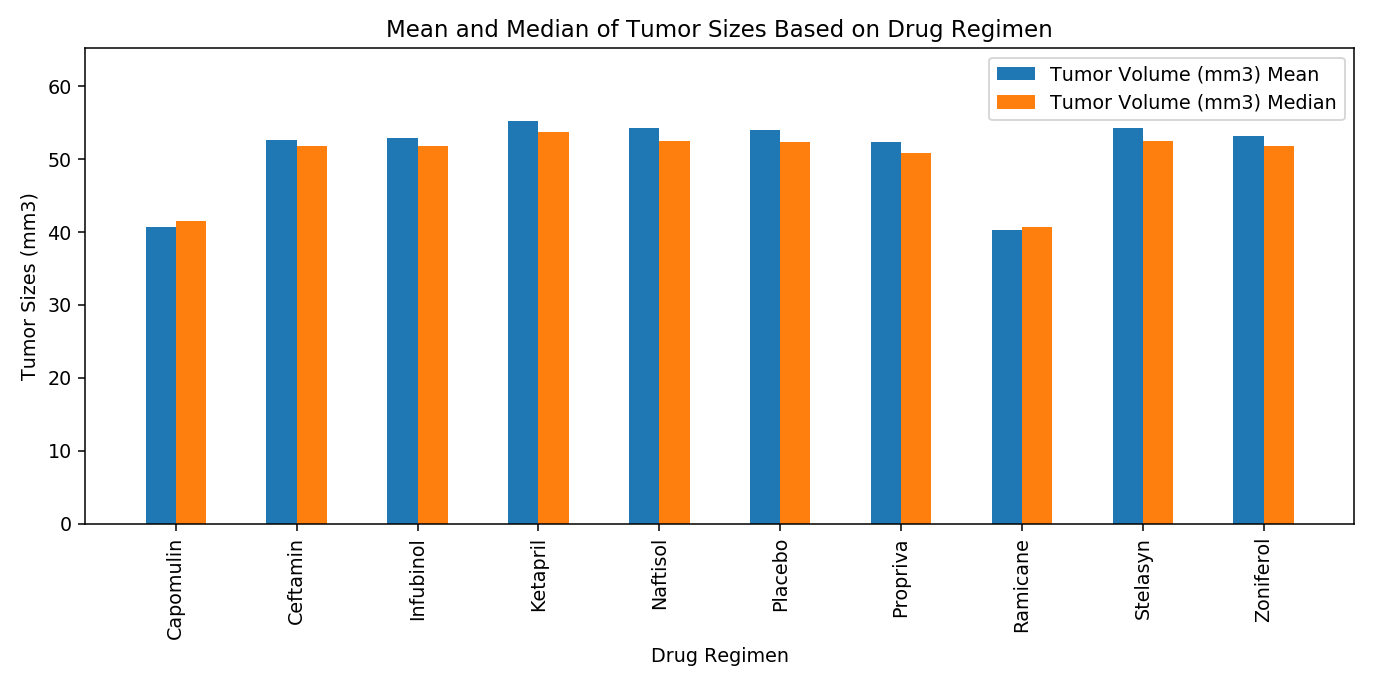

In [6]:
mean_panda_bar = tumor_calc_df.plot.bar(y=['Tumor Volume (mm3) Mean','Tumor Volume (mm3) Median'], rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Mean'].max() + 10)
plt.title("Mean and Median of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

In [ ]:
var_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) Variance', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Variance'].max() + 5)
plt.title("Variance of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


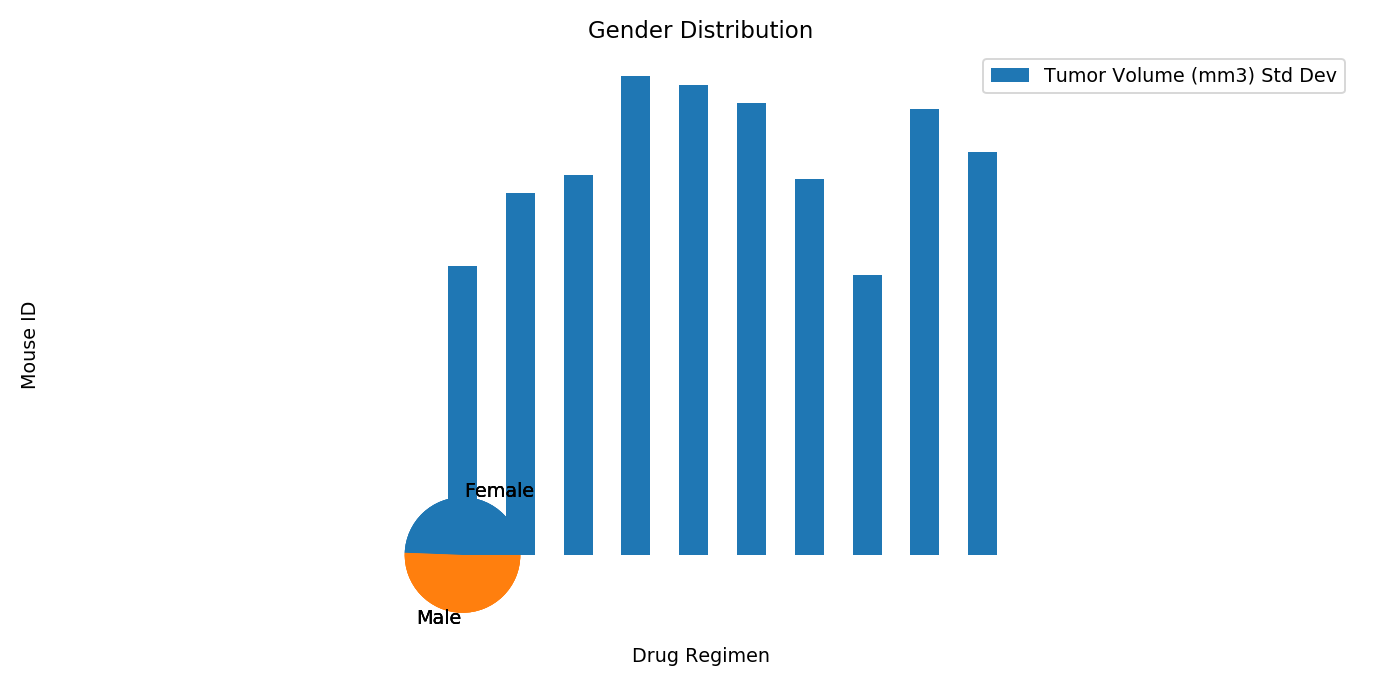

In [7]:
std_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) Std Dev', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Std Dev'].max() + 0.5)
plt.title("Standard Deviation of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

In [ ]:
sem_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) SEM', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) SEM'].max()+0.05)
plt.title("SEM of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

## Pie plots

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = joined_df.groupby(['Sex'])
gender_data = gender_df['Mouse ID'].count()

gender_pie = gender_data.plot(kind="pie", y=gender_data, title=("Gender Distribution"))

plt.show()
plt.tight_layout()
plt.axis("equal")

gender = gender_data.groupby('group')
gp.groups.keys()

TypeError: keys() takes no arguments (1 given)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = list(gender_df.index)

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0.1, 0, 0, 0)

gender_labels

AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen